In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Function to rotate a point
def rotate_point(point, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians)],
                                [np.sin(angle_radians), np.cos(angle_radians)]])
    return np.dot(rotation_matrix, point)


# Function to reflect a point
def reflect_point(point, line_angle_degrees):
    line_angle_radians = np.radians(line_angle_degrees)
    reflection_matrix = np.array([
        [np.cos(2 * line_angle_radians), np.sin(2 * line_angle_radians)],
        [np.sin(2 * line_angle_radians), -np.cos(2 * line_angle_radians)]
    ])
    return np.dot(reflection_matrix, point)


# Function to shear a point
def shear_point(point, shear_factor, direction='x'):
    if direction == 'x':
        shear_matrix = np.array([[1, shear_factor],
                                 [0, 1]])
    elif direction == 'y':
        shear_matrix = np.array([[1, 0],
                                 [shear_factor, 1]])
    return np.dot(shear_matrix, point)


# Function to scale a point
def scale_point(point, scale_factor):
    scaling_matrix = np.array([
        [scale_factor, 0],
        [0, scale_factor]
    ])
    return np.dot(scaling_matrix, point)

In [3]:
# Function to apply transformations to a set of vertices
def transform_shape(vertices, transformations):
    transformed_vertices = vertices.copy()
    for transform in transformations:
        type_ = transform['type']
        if type_ == 'rotation':
            theta = transform['theta']
            transformed_vertices = np.array([rotate_point(v, theta) for v in transformed_vertices])
        elif type_ == 'reflection':
            theta = transform['theta']
            transformed_vertices = np.array([reflect_point(v, theta) for v in transformed_vertices])
        elif type_ == 'shear':
            shear_factor = transform['shear_factor']
            direction = transform['direction']
            transformed_vertices = np.array([shear_point(v, shear_factor, direction) for v in transformed_vertices])
        elif type_ == 'scaling':
            scale_factor = transform['scale_factor']
            transformed_vertices = np.array([scale_point(v, scale_factor) for v in transformed_vertices])
    return transformed_vertices


In [4]:
# Function to plot a shape with vertex labels
def plot_shape(vertices, color='blue', label_prefix='P'):
    closed_vertices = np.append(vertices, [vertices[0]], axis=0)
    plt.plot(closed_vertices[:, 0], closed_vertices[:, 1], 'o-', color=color)
    for i, (x, y) in enumerate(vertices):
        plt.text(x + 0.1, y + 0.1, f'{label_prefix}{i+1}', fontsize=12, color=color)

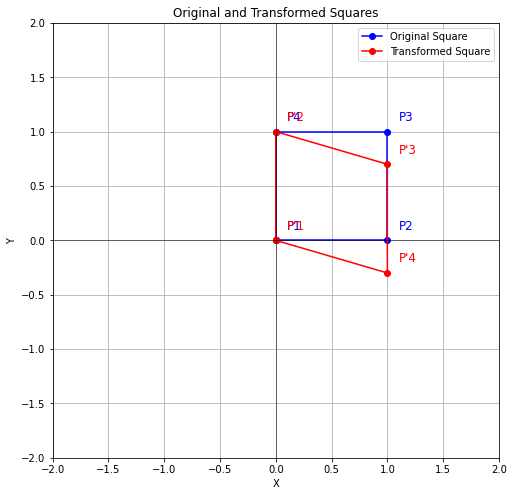

In [5]:
# Define vertices of a square
original_square = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])


# Plot the square
plt.figure(figsize=(8, 8))
plot_shape(original_square, color='blue', label_prefix='P')


# Sequence of transformations
transformations = [
    {'type': 'reflection', 'theta': 0},
    {'type': 'shear', 'shear_factor': 0.3, 'direction': 'x'},
    {'type': 'rotation', 'theta': 90},
    {'type': 'scaling','scale_factor': 1}
]

# Apply transformations to the original square
transformed_square = transform_shape(original_square, transformations)

# Plot the transformed square
plot_shape(transformed_square, color='red', label_prefix="P'")

# Set plot limits and labels
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend(['Original Square', 'Transformed Square'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original and Transformed Squares')

plt.show()


In [6]:
# Function to apply transformations to a set of vertices while plotting the shape after applying each transformation

def transform_shape_with_stepwise_plots(vertices, transformations):
    transformed_vertices = vertices.copy()
    for transform in transformations:
        type_ = transform['type']
        if type_ == 'rotation':
            theta = transform['theta']
            transformed_vertices = np.array([rotate_point(v, theta) for v in transformed_vertices])
            plot_shape(transformed_vertices, color='red', label_prefix="P'")
        elif type_ == 'reflection':
            theta = transform['theta']
            transformed_vertices = np.array([reflect_point(v, theta) for v in transformed_vertices])
            plot_shape(transformed_vertices, color='red', label_prefix="P'")
        elif type_ == 'shear':
            shear_factor = transform['shear_factor']
            direction = transform['direction']
            transformed_vertices = np.array([shear_point(v, shear_factor, direction) for v in transformed_vertices])
            plot_shape(transformed_vertices, color='red', label_prefix="P'")
        elif type_ == 'scaling':
            scale_factor = transform['scale_factor']
            transformed_vertices = np.array([scale_point(v, scale_factor) for v in transformed_vertices])
            plot_shape(transformed_vertices, color='red', label_prefix="P'")
    return transformed_vertices

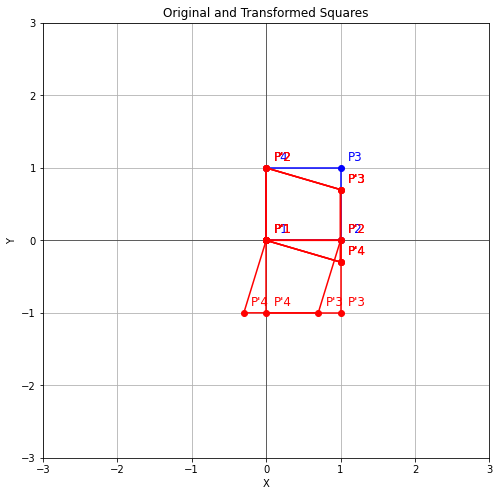

In [7]:
# Plot the square
plt.figure(figsize=(8, 8))
plot_shape(original_square, color='blue', label_prefix='P')

# Set plot limits and labels
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
#plt.legend(['Original Square', 'Transformed Square'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original and Transformed Squares')



# Sequence of transformations
transformations = [
    {'type': 'reflection', 'theta': 0},
    {'type': 'shear', 'shear_factor': 0.3, 'direction': 'x'},
    {'type': 'rotation', 'theta': 90},
    {'type': 'scaling','scale_factor': 1}
]

# Apply transformations to the original square
transformed_square = transform_shape_with_stepwise_plots(original_square, transformations)

# Plot the transformed square
plot_shape(transformed_square, color='red', label_prefix="P'")


plt.show()

To plot the shapes resulting after each transformation using a color gradient in the same plot:

In [8]:
from matplotlib import colors

In [9]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


Colors:
'b' - blue.
'c' - cyan.
'g' - green.
'k' - black.
'm' - magenta.
'r' - red.
'w' - white.
'y' - yellow.

In [10]:
# Function to apply transformations to a set of vertices while plotting the shape after applying each transformation
def transform_shape_with_stepwise_plots(vertices, transformations):
    transformed_vertices = vertices.copy()
    
    colours = get_color_gradient(matplotlib.colors.to_hex('b'), matplotlib.colors.to_hex('r'), len(transformations)+1)

    j = 0
    for transform in transformations:
        type_ = transform['type']
        j = j+1
        if type_ == 'rotation':
            theta = transform['theta']
            transformed_vertices = np.array([rotate_point(v, theta) for v in transformed_vertices])
            plot_shape(transformed_vertices, color=colours[j], label_prefix="P'")
        elif type_ == 'reflection':
            theta = transform['theta']
            transformed_vertices = np.array([reflect_point(v, theta) for v in transformed_vertices])
            plot_shape(transformed_vertices, color=colours[j], label_prefix="P'")
        elif type_ == 'shear':
            shear_factor = transform['shear_factor']
            direction = transform['direction']
            transformed_vertices = np.array([shear_point(v, shear_factor, direction) for v in transformed_vertices])
            plot_shape(transformed_vertices, color=colours[j], label_prefix="P'")
        elif type_ == 'scaling':
            scale_factor = transform['scale_factor']
            transformed_vertices = np.array([scale_point(v, scale_factor) for v in transformed_vertices])
            plot_shape(transformed_vertices, color=colours[j], label_prefix="P'")
        
    return transformed_vertices

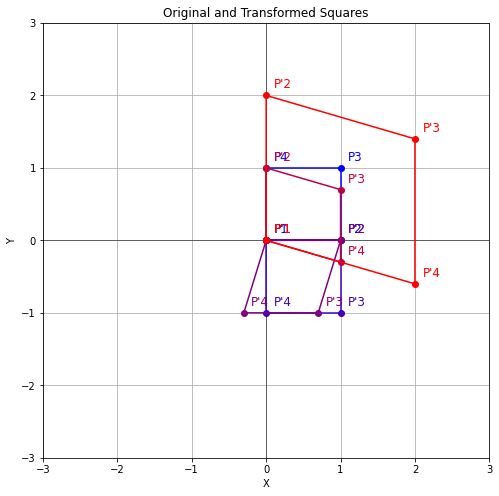

In [11]:
# Plot the square
plt.figure(figsize=(8, 8))
plot_shape(original_square, color='blue', label_prefix='P')

# Set plot limits and labels
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
#plt.legend(['Original Square', 'Transformed Square'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original and Transformed Squares')



# Sequence of transformations
transformations = [
    {'type': 'reflection', 'theta': 0},
    {'type': 'shear', 'shear_factor': 0.3, 'direction': 'x'},
    {'type': 'rotation', 'theta': 90},
    {'type': 'scaling','scale_factor': 2}
]


# Apply transformations to the original square
transformed_square = transform_shape_with_stepwise_plots(original_square, transformations)


""" # Now the final square need not be plotted again as it is already plotted inside the function.
# Plot the transformed square 
plot_shape(transformed_square, color='green', label_prefix="P'")
"""

plt.show()